In [1]:
using Base.Math
import Base.MathConstants
using HTTP
import JSON
import PrettyPrint
using Plots

In [2]:
function rectangle(w, h, x, y)
    return Shape(x .+ [0,w,w,0], y .+ [0,0,h,h])
end


function get_default_pitch(;scale=3, min_y=0, min_x=0, max_y=80, max_x=120, title="", titlefont=nothing)
    
    if !isnothing(titlefont)
        p = plot([min_y, max_y, max_y, min_y, min_y], [min_x, min_x, max_x, max_x, min_x], legend=false,
            title=title, size=(scale*160, scale*240), linecolor="white", axis=([], false), titlefont=titlefont)
    else
        p = plot([min_y, max_y, max_y, min_y, min_y], [min_x, min_x, max_x, max_x, min_x], legend=false,
            title=title, size=(scale*160, scale*240), linecolor="white", axis=([], false))
    end

    # Field rectangle
    plot!(p, rectangle(max_y, max_x, 0, 0), opacity=1, fillcolor="green3")
    # Plot halfway line
    plot!(p, [0, max_y], [max_x/2, max_x/2], linecolor="black")

    # Plot goals
    goal_size = 8 # yards?
    plot!(p, rectangle(8, -3, (max_y - goal_size)/2, 0), linecolor="black", fillcolor="white")
    plot!(p, rectangle(8, 3, (max_y - goal_size)/2, max_x), linecolor="black", fillcolor="white")

    # Plot 18-yard box
    plot!(p, rectangle(44, 18, (max_y - goal_size)/2 - 18, 0 ), linecolor="black", fillcolor="green3")
    plot!(p, rectangle(44, -18, (max_y - goal_size)/2 - 18, max_x ), linecolor="black", fillcolor="green3")
    
    # Plot the 6-yard box
    plot!(p, rectangle(20, 6, (max_y - goal_size)/2 - 6, 0 ), linecolor="black", fillcolor="green3")
    plot!(p, rectangle(20, -6, (max_y - goal_size)/2 - 6, max_x ), linecolor="black", fillcolor="green3")
    
    # Plot penalty spots
    scatter!(p, [max_y/2, max_y/2], [12, max_x-12], markercolor="black")
    
    # Plot the Ds
    pts = Plots.partialcircle(π/6, 5/6*π, 250, 12)
    x, y = Plots.unzip(pts)
    x = x .+ max_y / 2
    y = y .+ 12
    plot!(p, x, y, linecolor="black")

    pts = Plots.partialcircle(π*7/6, 11/6*π, 250, 12)
    x, y = Plots.unzip(pts)
    x = x .+ max_y / 2
    y = y .+ (max_x - 12)
    plot!(p, x, y, linecolor="black")
    
    # Plot center circle
    pts = Plots.partialcircle(0, 2π, 250, 10)
    x, y = Plots.unzip(pts)
    x .+= max_y / 2
    y .+= max_x / 2
    plot!(p, x, y, linecolor="black")
    return p
end

function plotshot(entry; team_color="blue1", opp_color="red1", scale=3.5, title="Title", font_size=4)
    p = get_default_pitch(title=title, scale=scale, titlefont=font(font_size, "Computer Modern"))
    if !("shot" in keys(entry))
        PrettyPrint.pprint(entry)
    end
    for player in entry["shot"]["freeze_frame"]
        if player["teammate"]
            mc = team_color
        else
            mc = opp_color
        end
        loc = player["location"]
        scatter!(p, [loc[2]], [loc[1]], markercolor=mc, legend=false)
    end
    loc = entry["location"]
    loc2 = entry["shot"]["end_location"][1:2]
    scatter!(p, [loc[2]], [loc[1]], markercolor=team_color, legend=false, label="Shot location",
             markershape=:star4, markersize=7)
    plot!(p, [loc[2], loc2[2]], [loc[1], loc2[1]], linecolor="white")
    return p
end

plotshot (generic function with 1 method)

In [3]:
url = "https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/15956.json"

r = HTTP.request("GET", url)

body = JSON.parse(String(r.body))
println(typeof(body))
PrettyPrint.pprint(body[1:5])

Vector{Any}
[
  {
    "duration" : 0.0,
    "period" : 1,
    "id" : "2bb933a9-8a0b-4cbf-8c8c-fa40816ed359",
    "minute" : 0,
    "second" : 0,
    "index" : 1,
    "play_pattern" : {"name" : "Regular Play", 
                      "id" : 1},
    "possession_team" : {"name" : "Real Valladolid", 
                         "id" : 901},
    "possession" : 1,
    "team" : {"name" : "Real Valladolid", 
              "id" : 901},
    "timestamp" : "00:00:00.000",
    "type" : {"name" : "Starting XI", 
              "id" : 35},
    "tactics" : {
                  "lineup" : [
                               {
                                 "position" : {"name" : "Goalkeeper", 
                                               "id" : 1},
                                 "jersey_number" : 1,
                                 "player" : {"name" : "Jordi Masip López", 
                                             "id" : 11302},
                               },
                               {
      

In [4]:
PrettyPrint.pprint(body[5])

{
  "player" : {"name" : "Luis Alberto Suárez Díaz", 
              "id" : 5246},
  "duration" : 0.914418,
  "location" : [61.0, 40.1],
  "period" : 1,
  "id" : "e903210f-74f2-4b9c-8169-e717645be161",
  "position" : {"name" : "Center Forward", 
                "id" : 23},
  "pass" : {
             "length" : 10.277159,
             "height" : {"name" : "Ground Pass", 
                         "id" : 1},
             "body_part" : {"name" : "Left Foot", 
                            "id" : 38},
             "end_location" : [50.9, 
                               42.0],
             "recipient" : {"name" : "Sergio Busquets i Burgos", 
                            "id" : 5203},
             "angle" : 2.955647,
             "type" : {"name" : "Kick Off", 
                       "id" : 65},
           },
  "minute" : 0,
  "second" : 0,
  "related_events" : ["7d2dbe79-f661-413f-a4b1-64ce30a85362",],
  "index" : 5,
  "play_pattern" : {"name" : "From Kick Off", 
                    "id" : 9},
  

In [5]:
temp = body[2721]
PrettyPrint.pprint(temp)

{
  "player" : {"name" : "Gerard Piqué Bernabéu", 
              "id" : 5213},
  "duration" : 1.187617,
  "location" : [22.9, 51.1],
  "period" : 2,
  "id" : "b0766a8d-1e62-4f93-828c-eeaa89293cea",
  "position" : {"name" : "Right Center Back", 
                "id" : 3},
  "minute" : 74,
  "second" : 32,
  "related_events" : ["d1b60ee4-5bcb-4163-ae25-a0e120c2769a", 
                      "e315b539-a3be-4692-8325-03118ccf6542"],
  "carry" : {
              "end_location" : [22.2, 
                                50.8],
            },
  "index" : 2721,
  "play_pattern" : {"name" : "From Goal Kick", 
                    "id" : 7},
  "possession_team" : {"name" : "Barcelona", 
                       "id" : 217},
  "possession" : 150,
  "team" : {"name" : "Barcelona", 
            "id" : 217},
  "timestamp" : "00:29:32.804",
  "type" : {"name" : "Carry", "id" : 43},
}

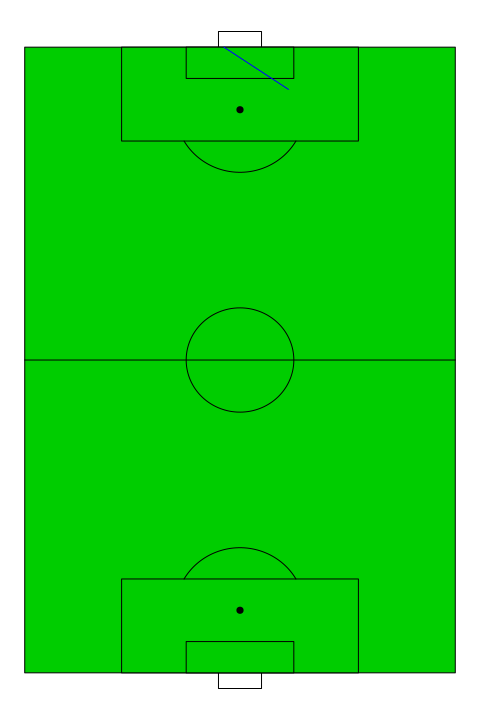

In [6]:
max_x = 120
max_y = 80
min_x = 0
min_y = 0
scale = 3.5

p = get_default_pitch()
cnt = 0

for i=1:length(body)
    entry = body[i]
    if (entry["type"]["name"] == "Shot" && entry["shot"]["outcome"]["name"] == "Goal")
        if (entry["possession_team"]["name"] == "Barcelona")
            mc = "blue1"
        else
            mc = "red1"
        end
#         for player in entry["shot"]["freeze_frame"]
#             println("")
#         end
        cnt += 1
        locs = [entry["location"], entry["shot"]["end_location"][1:2]]
        plot!(p, [locs[1][2], locs[2][2]], [locs[1][1], locs[2][1]], linecolor=mc)
    else
        continue
    end
end

p


In [7]:
temp = body[2721]
PrettyPrint.pprint(temp)

{
  "player" : {"name" : "Gerard Piqué Bernabéu", 
              "id" : 5213},
  "duration" : 1.187617,
  "location" : [22.9, 51.1],
  "period" : 2,
  "id" : "b0766a8d-1e62-4f93-828c-eeaa89293cea",
  "position" : {"name" : "Right Center Back", 
                "id" : 3},
  "minute" : 74,
  "second" : 32,
  "related_events" : ["d1b60ee4-5bcb-4163-ae25-a0e120c2769a", 
                      "e315b539-a3be-4692-8325-03118ccf6542"],
  "carry" : {
              "end_location" : [22.2, 
                                50.8],
            },
  "index" : 2721,
  "play_pattern" : {"name" : "From Goal Kick", 
                    "id" : 7},
  "possession_team" : {"name" : "Barcelona", 
                       "id" : 217},
  "possession" : 150,
  "team" : {"name" : "Barcelona", 
            "id" : 217},
  "timestamp" : "00:29:32.804",
  "type" : {"name" : "Carry", "id" : 43},
}

In [8]:
# # figure = Plots.figure()
# scale = 3
# p = get_default_pitch(title="Messi FK, 64' goal", scale=3.5)
# for player in temp["shot"]["freeze_frame"]
#     if player["teammate"]
#         mc = "blue1" 
#     else
#         mc = "red1"
#     end
#     label = player["player"]["id"]
#     loc = player["location"]
#     scatter!(p, [loc[2]], [loc[1]], markercolor=mc, legend=false)
# end

# loc = temp["location"]
# loc2 = temp["shot"]["end_location"][1:2]

# scatter!(p, [loc[2]], [loc[1]], markercolor="blue1", legend=false, label="FK Location", markershape=:star4, markersize=7)
# plot!(p, [loc[2], loc2[2]], [loc[1], loc2[1]], linecolor="white")
# p
# # savefig(p, "messi_fk")

In [9]:
plots = []
font_size = 7
for i=1:length(body)
    entry = body[i]
    if (entry["type"]["name"] == "Shot")
        minute = entry["minute"] + 1
        pname = entry["player"]["name"]
        res = entry["shot"]["outcome"]["name"]
        xG = entry["shot"]["statsbomb_xg"]
        title = "$(minute)': $(pname)\nresult: $(res) xG: $(xG)"
        if (entry["possession_team"]["name"] == "Barcelona")
            p = plotshot(entry, title=title, font_size=font_size)
        else
            p = plotshot(entry, team_color="red1", opp_color="blue1", title=title, font_size=font_size)
        end
        plots = Base.cat(plots, [p], dims=1)
    end
end

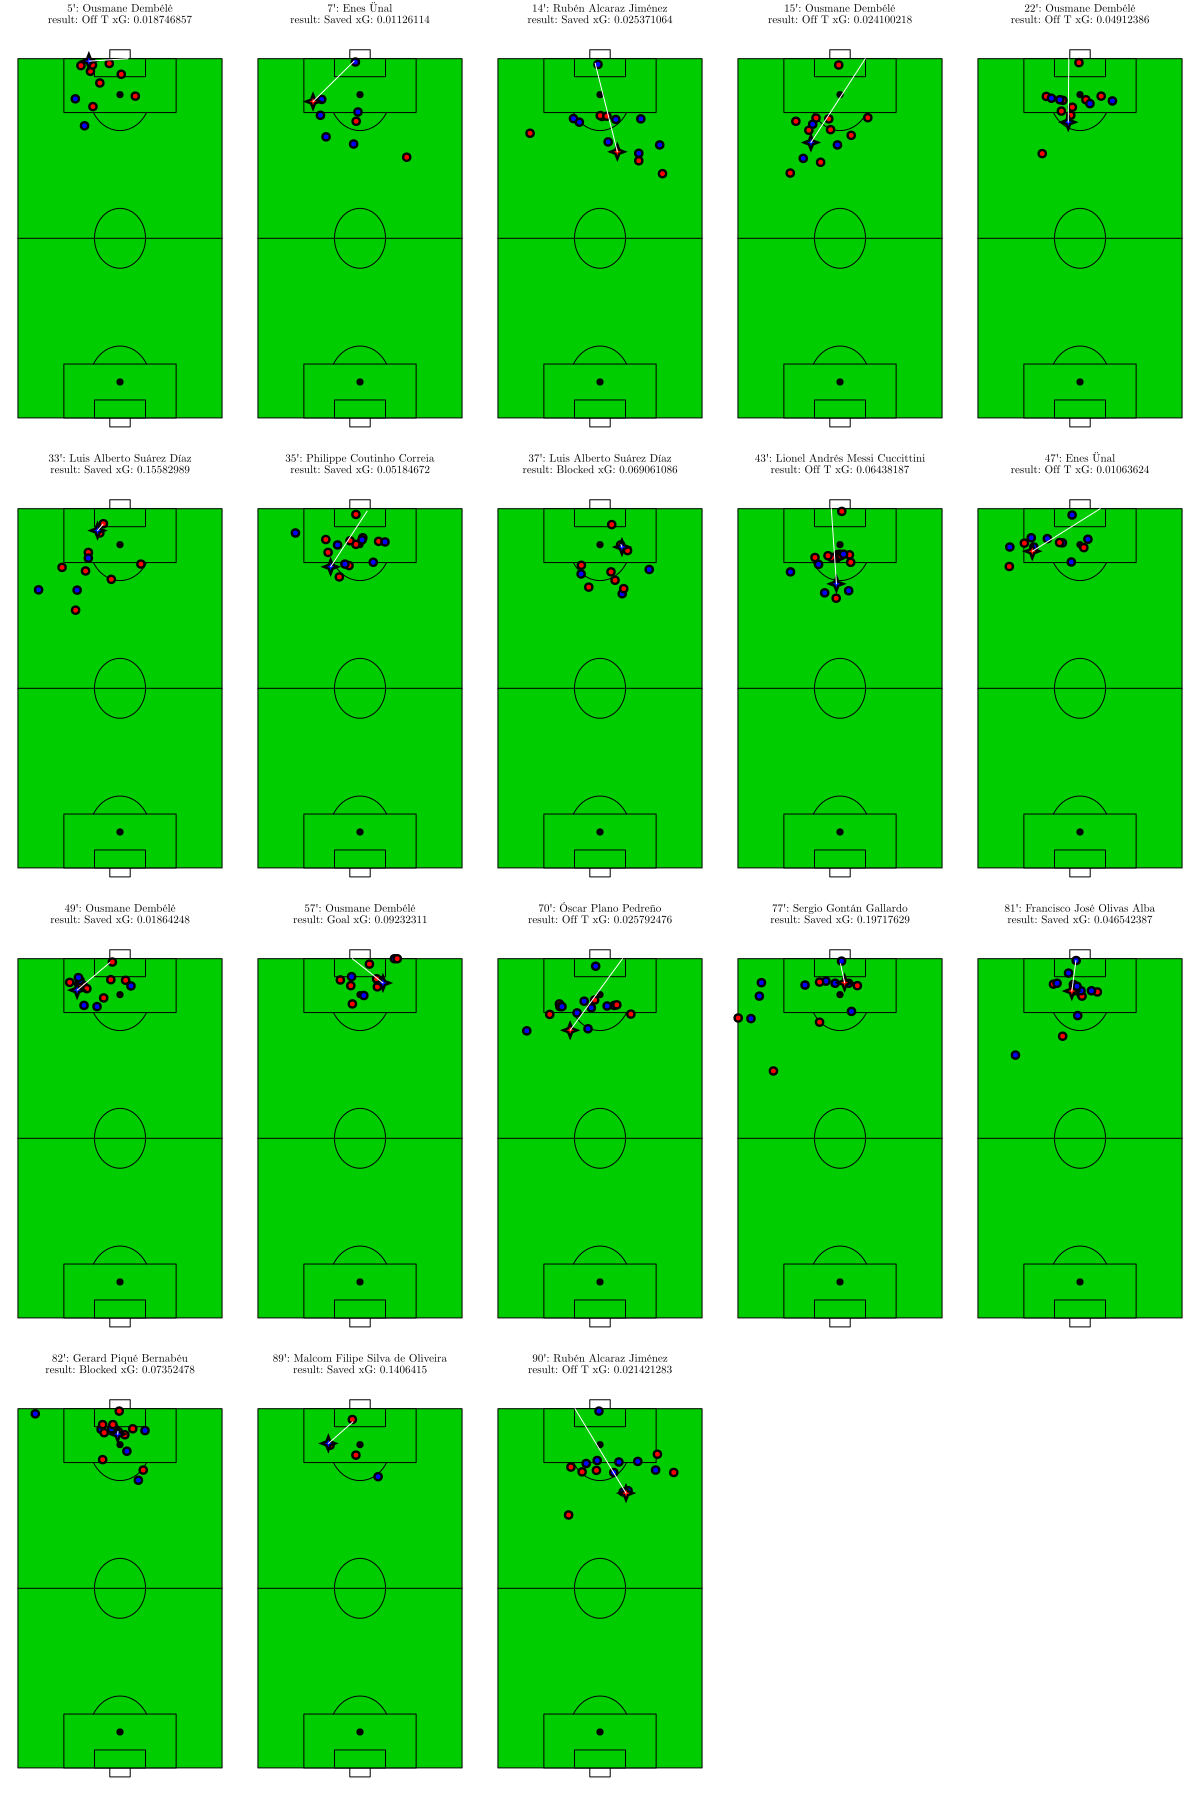

In [10]:
f = plot(plots..., layout=length(plots), size=(1200, 1800))
savefig(f, "shots_in_game")
f